In [2]:
# MAR20 imports
import os
# import cv2
# import numpy as np
# import pandas as pd
# from PIL import Image
# import matplotlib.pyplot as plt


# MAR20

In [ ]:
dataset_path = 'path_to_mar20_dataset'
images_dir = os.path.join(dataset_path, 'images')
annotations_dir = os.path.join(dataset_path, 'annotations')

# Load the annotations
def load_annotations(annotation_file):
    with open(annotation_file, 'r') as f:
        lines = f.readlines()
    annotations = []
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:5])
        annotations.append({
            'class_id': class_id,
            'x_center': x_center,
            'y_center': y_center,
            'width': width,
            'height': height
        })
    return annotations

# Preprocess the images and annotations
def preprocess_image(image_path, annotations, target_size=(224, 224)):
    # Load the image
    image = Image.open(image_path).convert('RGB')
    original_width, original_height = image.size
    
    # Resize the image
    image = image.resize(target_size)
    resized_width, resized_height = target_size
    
    # Adjust the annotations for the resized image
    resized_annotations = []
    for ann in annotations:
        x_center = ann['x_center'] * resized_width / original_width
        y_center = ann['y_center'] * resized_height / original_height
        width = ann['width'] * resized_width / original_width
        height = ann['height'] * resized_height / original_height
        resized_annotations.append({
            'class_id': ann['class_id'],
            'x_center': x_center,
            'y_center': y_center,
            'width': width,
            'height': height
        })
    
    # Convert image to numpy array
    image_array = np.array(image)
    
    return image_array, resized_annotations

# Example usage
image_filename = 'example_image.jpg'  # Replace with an actual image filename
annotation_filename = 'example_annotation.txt'  # Replace with an actual annotation filename

image_path = os.path.join(images_dir, image_filename)
annotation_path = os.path.join(annotations_dir, annotation_filename)

annotations = load_annotations(annotation_path)
image_array, resized_annotations = preprocess_image(image_path, annotations)

# Display the image with annotations
def display_image_with_annotations(image, annotations):
    plt.imshow(image)
    for ann in annotations:
        x_center, y_center, width, height = ann['x_center'], ann['y_center'], ann['width'], ann['height']
        x_min = int(x_center - width / 2)
        y_min = int(y_center - height / 2)
        x_max = int(x_center + width / 2)
        y_max = int(y_center + height / 2)
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    plt.imshow(image)
    plt.show()

display_image_with_annotations(image_array, resized_annotations)

# Russian-military-annotated by
- Tuomo Hiippala
- Digital Geography Lab
- Department of Geosciences and Geography
- University of Helsinki, Finland

In [3]:
from dotenv import load_dotenv
from roboflow import Roboflow
load_dotenv()


rf = Roboflow(api_key=os.getenv("ROBFLOW_API_KEY"))
project = rf.workspace("capstoneproject").project("russian-military-annotated")
version = project.version(4)
dataset = version.download("tfrecord")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Russian-military-annotated-4 in tfrecord:: 100%|████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 177.03it/s]


'C:\\Users\\Gram\\Desktop\\NULP\\uav_img_cap\\notebooks\\Russian-military-annotated-4'

In [2]:
from transformers import pipeline

pipe = pipeline("image-text-to-text", model="llava-hf/llava-v1.6-mistral-7b-hf")
messages = [
    {
      "role": "user",
      "content": [
          {"type": "image", "url": "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg"},
          {"type": "text", "text": "What does the label 15 represent? (1) lava (2) core (3) tunnel (4) ash cloud"},
        ],
    },
]

out = pipe(text=messages, max_new_tokens=20)
print(out)

C:\Users\Gram\Desktop\NULP\uav_img_cap\diploma_uni_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Gram\Desktop\NULP\uav_img_cap\diploma_uni_env\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Gram\.cache\huggingface\hub\models--llava-hf--llava-v1.6-mistral-7b-hf. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pyth

In [15]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained(
    "distilgpt2",
    device_map="cpu",
    output_hidden_states=True# Forces the model to load on the CPU
)


C:\Users\Gram\Desktop\NULP\uav_img_cap\diploma_uni_env\lib\site-packages\transformers\generation\configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


In [18]:
# !pip install accelerate
from accelerate import Accelerator

# Ensure the tokenizer has a padding token
tokenizer.pad_token = tokenizer.eos_token  # Use eos_token as pad_token

accelerator = Accelerator()
model, tokenizer = accelerator.prepare(model, tokenizer)



In [9]:
import torchvision.models as models

vision_model = models.mobilenet_v3_small(pretrained=True)
vision_model.eval()  # Set to evaluation mode


C:\Users\Gram\Desktop\NULP\uav_img_cap\diploma_uni_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Gram\Desktop\NULP\uav_img_cap\diploma_uni_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to C:\Users\Gram/.cache\torch\hub\checkpoints\mobilenet_v3_small-047dcff4.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [21]:
class SimpleMultimodalPipeline(nn.Module):
    def __init__(self, vision_model, language_model):
        super(SimpleMultimodalPipeline, self).__init__()
        self.vision_model = vision_model
        self.language_model = language_model
        self.fusion_layer = nn.Linear(1000 + 768, 768)

    def forward(self, image, text_input):
        # Extract vision features
        vision_features = self.vision_model(image)
        
        # Tokenize text and extract language features
        text_tokens = tokenizer(text_input, return_tensors="pt", padding=True, truncation=True)
        outputs = self.language_model(**text_tokens)
        hidden_states = outputs.hidden_states[-1]
        
        # Combine vision and text features
        combined_features = torch.cat((vision_features, hidden_states[:, 0, :]), dim=-1)
        fused_output = self.fusion_layer(combined_features)
        return fused_output


In [11]:
import requests
from PIL import Image
from io import BytesIO

url = "https://www.ilankelman.org/stopsigns/australia.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

img.show()


In [12]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image_tensor = transform(img).unsqueeze(0)


In [38]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

image_url = "https://www.ilankelman.org/stopsigns/australia.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

inputs = processor(image, return_tensors="pt")
output_ids = model.generate(**inputs)
caption = processor.decode(output_ids[0], skip_special_tokens=True)
print("Generated Caption:", caption)


C:\Users\Gram\Desktop\NULP\uav_img_cap\diploma_uni_env\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Gram\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Generated Caption: a stop sign on a street corner


In [20]:
pipeline = SimpleMultimodalPipeline(vision_model, model)

text_input = "What is the significance of this Australian stop sign?"

# text_tokens = tokenizer(text_input, return_tensors="pt", padding=True, truncation=True)


image_tensor = image_tensor.to("cpu")
output = pipeline(image_tensor, text_input)

print("Multimodal output:", output)

AttributeError: 'CausalLMOutputWithCrossAttentions' object has no attribute 'last_hidden_state'

# Runpod generation LLaVA

In [ ]:
!pip install roboflow, pillow, transformers, requests


In [ ]:
from PIL import Image
import requests
from transformers import AutoProcessor, LlavaForConditionalGeneration

model = LlavaForConditionalGeneration.from_pretrained("liuhaotian/llava-v1.6-mistral-7b")
processor = AutoProcessor.from_pretrained("liuhaotian/llava-v1.6-mistral-7b")

In [ ]:
import os
from roboflow import Roboflow
import glob
                
# Path to dataset images
rf = Roboflow(api_key=os.getenv("ROBFLOW_API_KEY"))
project = rf.workspace("capstoneproject").project("russian-military-annotated")
version = project.version(4)
dataset = version.download("coco")
print(f"Dataset downloaded to {dataset}")

In [ ]:
# Path to dataset images
image_dir1 = os.path.join(dataset.location, "train")
image_dir2 = os.path.join(dataset.location, "test")
image_dir3 = os.path.join(dataset.location, "valid")

image_files = glob.glob(f"{image_dir1}/*.jpg") 
image_files += glob.glob(f"{image_dir2}/*.jpg") 
image_files += glob.glob(f"{image_dir3}/*.jpg") 


# Describe an image
def describe_image(image_path):
    prompt = "USER: <image>\nDescribe the image in as much detail as possible, focusing on every element," \
             " such as place, objects, kind of vehicles, people's clothing or uniform and any important features." \
             " ASSISTANT:"
    
    image = Image.open(image_path)
    inputs = processor(images=image, text=prompt, return_tensors="pt")

    # Generate
    generate_ids = model.generate(**inputs, max_new_tokens=300)
    description = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
    
    return description

# Run inference
results = []

for image_file in image_files:
    description = describe_image(image_file)
    results.append({"image": image_file, "description": description})    
    break

# Save results to a JSON file
import json
with open("inference_results.json", "w") as f:
    json.dump(results, f, indent=4)

os.path.join(os.getcwd(), "inference_results.json")


In [50]:
import subprocess

def send_from_runpod(file_path):
    try:
        subprocess.run(["runpodctl", "send", file_path])
    except subprocess.CalledProcessError as e:
        print(f"Error sending file: {e}")
        
send_from_runpod(os.path.join(os.getcwd(), "inference_results.json"))

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
import subprocess

def download_from_runpod(code):
    """
    Download a file from RunPod instance to local machine using runpodctl.
    
    Parameters:
    remote_file_path (str): Path of the file on the RunPod instance.
    local_file_path (str): Path where the file will be saved locally.
    """
    # Execute the runpodctl command to download the file
    try:
        subprocess.run(['runpodctl', 'recieve', code])
    except subprocess.CalledProcessError as e:
        print(f"Error downloading file: {e}")

# Example usage
code = ''
download_from_runpod(code)


# Runpod generation Kosmos-2


In [ ]:
!pip install roboflow pillow transformers requests tqdm


In [ ]:
import os
from roboflow import Roboflow
import glob
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader


prompt = (
    "<grounding> Describe this image in detail: "
    "Provide a comprehensive caption that explains every visible object,"
    " its attributes, and how objects relate spatially. "
)


In [ ]:
# Path to dataset images
rf = Roboflow(api_key=os.getenv("ROBFLOW_API_KEY"))
project = rf.workspace("capstoneproject").project("russian-military-annotated")
version = project.version(4)
dataset = version.download("coco")
print(f"Dataset downloaded to {dataset}")

image_files = []
# Path to dataset images
for dir_name in ["train", "test", "valid"]:
    image_dir = os.path.join(dataset.location, dir_name)
    image_files += glob.glob(f"{image_dir}/*.jpg") 


In [ ]:
from PIL import Image
import requests
from transformers import AutoProcessor, Kosmos2ForConditionalGeneration
prompt = (
    "<grounding> Describe this image in detail: "
    "Provide a comprehensive caption that explains every visible object,"
    " its attributes, and how objects relate spatially. "
)
model = Kosmos2ForConditionalGeneration.from_pretrained("microsoft/kosmos-2-patch14-224")
processor = AutoProcessor.from_pretrained("microsoft/kosmos-2-patch14-224")
model = model.to('cuda')
def describe_image(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    inputs = {key: val.to('cuda') for key, val in inputs.items()}
    generated_ids = model.generate(
        pixel_values=inputs["pixel_values"],
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        image_embeds=None,
        image_embeds_position_mask=inputs["image_embeds_position_mask"],
        use_cache=True,
        max_new_tokens=128,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    caption, entities = processor.post_process_generation(generated_text)

    return caption, entities

# Run inference
results = []

for image_path in tqdm(image_files, desc="Processing Images"):
    cap, entities = describe_image(image_path)
    res = {"image": image_path, "description": cap, "entities": entities}
    results.append(res)
    
    if len(results)%100==0:
        # Save results to a JSON file
        with open("inference_results_kosmos_2.json", "w") as f:
            json.dump(results, f, indent=4)

with open("inference_results_kosmos_2.json", "w") as f:
    json.dump(results, f, indent=4)
        

os.path.join(os.getcwd(), "inference_results_kosmos_2.json")


In [3]:
import os
from roboflow import Roboflow
import glob
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader


prompt = (
    "<grounding> Describe this image in detail: "
    "Provide a comprehensive caption that explains every visible object, its attributes, and how objects relate spatially. "
)


# Path to dataset images
rf = Roboflow(api_key=os.getenv("ROBFLOW_API_KEY"))
project = rf.workspace("capstoneproject").project("russian-military-annotated")
version = project.version(4)
dataset = version.download("coco")
print(f"Dataset downloaded to {dataset}")

image_files = []
# Path to dataset images
for dir_name in ["train", "test", "valid"]:
    image_dir = os.path.join(dataset.location, dir_name)
    image_files += glob.glob(f"{image_dir}/*.jpg") 


loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded to <roboflow.core.dataset.Dataset object at 0x000001BB94FDFA60>


In [10]:
from PIL import Image
image = Image.open(image_files[0]).convert("RGB")
image._size

(416, 416)

# last step Verification and Captioning

In [12]:
!pip install langchain langchain-community huggingface_hub roboflow pillow transformers requests tqdm pandas
# pip install -q diffusers transformers accelerate peft


In [ ]:
from huggingface_hub import login
token=...
login(token)

## Ollama

In [208]:
prompt_template_llama2_general = """
You are an advanced language model tasked with merging detailed captions generated by two multimodal systems. Your goal is to create a unified, highly detailed, and factually accurate description of the image.

### Instructions:
- Combine the details from both captions, ensuring all critical elements (objects, actions, spatial relationships, and contextual nuances) are represented.
- Maintain a coherent and consistent tone throughout the output.
- Avoid contradictions or redundant details; instead, refine and enhance the combined information for clarity.
- Incorporate additional entities provided, enriching the description with fine-grained visual and contextual details.
- The resulting caption should serve as the most comprehensive and accurate summary of the image.

### Input Captions:
1. Caption 1: {caption1}
2. Caption 2: {caption2}

### Additional Entities:
- {entities}

### Output:
Write a single, unified caption that captures the full essence of the image, accurately representing all provided details and entities.
"""

prompt_template_llama2_object_detection = """
You are an advanced language model tasked with merging detailed captions generated by two multimodal systems. Your goal is to create a unified, highly detailed, and factually accurate description of the image.  

Below is a detailed description of an image. Your task is to extract and list every object mentioned in the description that can be reliably detected by an object detection model. Please follow these instructions carefully:  

### Instructions:  
1. Identify each object that is clearly described and can be recognized by typical object detection systems.  
2. Be very cautious with numerical details attached to the objects.  
3. Do not combine or generalize objects if different numbers are specified. Each unique instance should be explicitly listed.  

### Detailed Description:  
{description}  

### Output:  
You must return the response in **EXACTLY** this JSON format. If the response is not formatted as JSON, it will be invalid.  

```json
{
    "results": ["<list of objects>"]
}
"""

final_caption_prompt_template = """
You are an advanced language model tasked with refining a detailed image caption. Your goal is to ensure that the caption is both highly detailed and free of hallucinations by cross-checking it against detection probabilities from an object detection model.

### Instructions:
1. Carefully analyze the provided detailed description of the image.
2. For each object in the description:
   - Cross-check its presence using the detection probabilities from the object detection model.
   - If the probability of detection for an object is high (e.g., above 0.1), retain the object in the caption.
   - If the probability of detection for an object is low (e.g., below 0.1), treat it as a potential hallucination and decide whether to remove it from the caption.
   - If the object is not present in the detection probabilities, leave it unchanged in the caption.
3. Ensure that the revised caption maintains logical flow, coherence, and a consistent tone after removing hallucinated objects.
4. Do not add any new objects or make assumptions beyond the provided information.

### Inputs:
- Detailed Description: {description}
- Detection Probabilities: {object_probabilities}

### Output:
Write a revised, highly detailed caption where all described objects are verified as detected and potential hallucinations are removed.
"""

In [24]:
# import json
import os
import pandas as pd
from tqdm import tqdm

# import pandas as pd

root_dir = os.getcwd()
path_to_kosmos = os.path.join(root_dir, "inference_results_kosmos_2.json")
path_to_llava = os.path.join(root_dir, "inference_results_llava_first_step.json")

kosmos_res = pd.read_json(path_to_kosmos)
llava_res = pd.read_json(path_to_llava)

first_step_df = kosmos_res.merge(llava_res, on="image", suffixes=("_kosmos", "_llava")).drop_duplicates(subset="image", keep="last")
# with open(path_to_file, "rb") as f:
#     kosmos_inference_res = json.loads(f.read())
# pd.read_json(kosmos_inference_res)
inputs = first_step_df.iloc[0]

In [17]:
# %pip install langchain-community
# ! curl -fsSL https://ollama.com/install.sh | sh

# typing extensions problem
# Ollama serve first in cmd -> then you can pull the llama2:13b version you need
# you can drag and drop files in runpod

In [ ]:
from langchain.prompts import PromptTemplate
# from langchain_community.chat_models import ChatOllama
from langchain.llms import HuggingFacePipeline
from langchain_core.output_parsers.string import StrOutputParser
from langchain_core.output_parsers import JsonOutputParser
from transformers import pipeline
import timeit


local_llm = "llama2:13b"
model_name = "meta-llama/Llama-2-7b"

prompt_general = PromptTemplate(template=prompt_template_llama2_general, input_variables=["caption1", "caption2", "entities"])
prompt_object_detection = PromptTemplate(template=prompt_template_llama2_object_detection, input_variables=["description"])
prompt_final = PromptTemplate(template=final_caption_prompt_template, input_variables=["initial_description", "description", "object_probabilities"])

C:\Users\Gram\Desktop\NULP\uav_img_cap\diploma_uni_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# середній час одного тексту 5сек


# del llmM
# first_step_df.description_llava.str.split("ASSISTANT:").str[1]

# Convert the formatted prompt into the expected message format
# messages = [{"role": "user", "content": formatted_prompt}]
start = timeit.timeit()

# LLM
# llm = ChatOllama(model=local_llm, temperature=0.2, num_gpu=1)
hf_pipeline = pipeline("text-generation", model=model_name, device=0)
llm = HuggingFacePipeline(
    pipeline=hf_pipeline,
    model_kwargs={"temperature": 0.2, "max_length": 100, "top_k": 50, "top_p": 0.95}
)

# llm = HuggingFacePipeline()

first_step_llama = prompt_general | llm | StrOutputParser()

first_step_responses = []
for inputs in tqdm(first_step_df.iterrows(), desc="First step llama2 generation"):
    # Call the LLM with the correctly formatted messages
    response_first = first_step_llama.invoke(dict(
                                                caption1=inputs["description_llava"].split("ASSISTANT:")[1],
                                                caption2=inputs["description_kosmos"],
                                                entities=", ".join([entities[0] for entities in inputs["entities"]])
                                             ))
    
    first_step_responses.append({"image": inputs["image"], "description_llama_first": response_first})
    
    if len(first_step_responses) % 100 == 0:
        with open("inference_llama_first.json", "w") as f:
            json.dump(first_step_responses, f, indent=4)
    
with open("inference_llama_first.json", "w") as f:
    json.dump(first_step_responses, f, indent=4)

end = timeit.timeit()
inf_time = {}

with open("inference_time.json", "wb") as f:
    inf_time["inference_llama_first_time"] = end - start
    json.dump(inf_time, f)
    

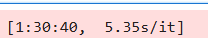

In [ ]:
with open("inference_time.json", "rb") as f:
    inf_time = json.loads(f.read())    
    
with open("inference_llama_first.json", "r") as f:
    first_step_responses = json.loads(f.read())


In [38]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to("cuda")

# Start timer
start = timeit.default_timer()

second_step_responses = []

for response_first in tqdm(first_step_responses, desc="Second step llama2 generation"):
    # Preprocess input: tokenize the description
    print()
    formatted_description = prompt_object_detection.format(description=response_first["description_llama_first"])
    inputs_enc = tokenizer(formatted_description, return_tensors="pt").to("cuda")

    # Run inference with torch.no_grad() to save memory
    with torch.no_grad():
        output = model.generate(
            inputs_enc["input_ids"],
            max_new_tokens=100,  # Control the number of tokens generated
            temperature=0.5,
            top_k=50,
            top_p=0.95
        )

    # Decode the generated response
    response_second = tokenizer.decode(output[0], skip_special_tokens=True)
    
    # Append the results with image info
    second_step_responses.append({
        "image": response_first["image"],
        "objects_llama_second": response_second  # Use the decoded text as the result
    })

    # Save results in batches
    if len(second_step_responses) % 100 == 0:
        with open("inference_llama_second.json", "w") as f:
            json.dump(second_step_responses, f, indent=4)

# Final result saving
with open("inference_llama_second.json", "w") as f:
    json.dump(second_step_responses, f, indent=4)

# End timer
end = timeit.default_timer()

# Save inference time
inf_time = {}
with open("inference_time.json", "w") as f:
    inf_time["inference_llama_second_time"] = end - start
    json.dump(inf_time, f)

NameError: name 'AutoTokenizer' is not defined

In [44]:
import json
import json
import re

# Assume 'output' is the string returned by the model.
# This regex extracts the first JSON object found.
pattern = r'json\s*(\{.*?\})\s*'

for res in json.loads(open("../processed_data/inference_llama_second.json").read()):
    output = res["objects_llama_second"]
    # json_str = re.search(r'\{.*\}', , re.DOTALL).group(0)
    # match = re.search(r'(\{.*\})', output, re.DOTALL)
    # matches = re.findall(pattern, output, re.DOTALL)

    # try:
    print(output)
    res = json.loads(matches[1])
    break
    # print(res)
    # except Exception as e:
    #     print(e)
    #     print(output)
    #     break
# if match:
#     json_str = match.group(1)
#     print(json_str)
#     data = json.loads(json_str)
#     print(data)
# else:
#     print("No JSON object found.")
    
# data = json.loads(json_str)
# print(data)




You are an advanced language model tasked with merging detailed captions generated by two multimodal systems. Your goal is to create a unified, highly detailed, and factually accurate description of the image.

Below is a detailed description of an image. Your task is to extract and list every object mentioned in the description that can be reliably detected by an object detection model. Please follow these instructions carefully:

### Instructions:
1. Identify each object that is clearly described and can be recognized by typical object detection systems.
2. Be very cautious with numerical details attached to the objects.
3. Do not combine or generalize objects if different numbers are specified. Each unique instance should be explicitly listed.
4. **Return only the JSON object in the exact format provided. Your response must contain only the JSON code block as specified. Do not wrap it in markdown, provide any explanations, or include any other content.**

### Detailed Description:


IndexError: list index out of range

In [37]:
print(output)


 [INST] <<SYS>>
You are an advanced language model tasked with merging detailed captions generated by two multimodal systems. Your goal is to create a unified, highly detailed, and factually accurate description of the image.

Below is a detailed description of an image. Your task is to extract and list every object mentioned in the description that can be reliably detected by an object detection model. Please follow these instructions carefully:

### Instructions:
1. Identify each object that is clearly described and can be recognized by typical object detection systems.
2. Be very cautious with numerical details attached to the objects.
3. Do not combine or generalize objects if different numbers are specified. Each unique instance should be explicitly listed.
4. **Return only the JSON object in the exact format provided. Your response must contain only the JSON code block as specified. Do not wrap it in markdown, provide any explanations, or include any other content.**

### Output

In [48]:
print(json.loads(open("../processed_data/inference_llama_second.json").read())[0]["objects_llama_second"])


You are an advanced language model tasked with merging detailed captions generated by two multimodal systems. Your goal is to create a unified, highly detailed, and factually accurate description of the image.

Below is a detailed description of an image. Your task is to extract and list every object mentioned in the description that can be reliably detected by an object detection model. Please follow these instructions carefully:

### Instructions:
1. Identify each object that is clearly described and can be recognized by typical object detection systems.
2. Be very cautious with numerical details attached to the objects.
3. Do not combine or generalize objects if different numbers are specified. Each unique instance should be explicitly listed.
4. **Return only the JSON object in the exact format provided. Your response must contain only the JSON code block as specified. Do not wrap it in markdown, provide any explanations, or include any other content.**

### Detailed Description:


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import timeit
import json
from tqdm import tqdm

# # Initialize the tokenizer and model, explicitly transferring them to GPU
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to("cuda")


# LLM
# hf_pipeline = pipeline("text-generation", model=model_name, device=0)
# llm = HuggingFacePipeline(
#     pipeline=hf_pipeline,
#     model_kwargs={"temperature": 0.5, "max_new_tokens": 100, "top_k": 50, "top_p": 0.95}
# )


# llm = ChatOllama(model=local_llm, temperature=0.5, format="json", num_gpu=1)
# second_step_llama = prompt_object_detection | llm | JsonOutputParser()

second_step_responses = []

# Start timer
start = timeit.default_timer()

second_step_responses = []
end_i = 0
for i, response_first in tqdm(first_step_responses, desc="Second step llama2 generation"):
    # Preprocess input: tokenize the description
    formatted_description = prompt_object_detection.format(description=response_first["description_llama_first"])
    inputs_enc = tokenizer(formatted_description, return_tensors="pt").to("cuda")

    # Run inference with torch.no_grad() to save memory
    with torch.no_grad():
        output = model.generate(
            inputs_enc["input_ids"],
            max_new_tokens=100,  # Control the number of tokens generated
            temperature=0.5,
            top_k=50,
            top_p=0.95
        )

    try:
        parsed_output = json.loads(response_second)  # Parse the JSON string into a Python dictionary
    except json.JSONDecodeError as e:    
        with open("inference_llama_second.json", "w") as f:
            json.dump(second_step_responses, f, indent=4)
        raise e
        
    
        
    # Decode the generated response
    response_second = tokenizer.decode(output[0], skip_special_tokens=True)
    
    # Append the results with image info
    second_step_responses.append({
        "image": response_first["image"],
        "objects_llama_second": response_second  # Use the decoded text as the result
    })

    # Save results in batches
    if len(second_step_responses) % 100 == 0:
        with open("inference_llama_second.json", "w") as f:
            json.dump(second_step_responses, f, indent=4)

# Final result saving
with open("inference_llama_second.json", "w") as f:
    json.dump(second_step_responses, f, indent=4)

# End timer
end = timeit.default_timer()

# Save inference time
inf_time = {}
with open("inference_time.json", "w") as f:
    inf_time["inference_llama_second_time"] = end - start
    json.dump(inf_time, f)


In [1]:
from langchain.output_parsers import parse_json


ImportError: cannot import name 'parse_json' from 'langchain.output_parsers' (C:\Users\Gram\Desktop\NULP\uav_img_cap\diploma_uni_env\lib\site-packages\langchain\output_parsers\__init__.py)

In [ ]:
del hf_pipeline
del llm
del second_step_llama

## CLIPViT object detection

In [145]:
# import requests
from PIL import Image
import torch

# from transformers import OwlViTProcessor, OwlViTForObjectDetection
from transformers import CLIPProcessor, CLIPModel

start = timeit.timeit()

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")
model = model.to("cuda")

verification_responses = []

for i, inputs in tqdm(second_step_responses, desc="Objects verification with CLIPViT"):
    texts = inputs["results"]
    image = Image.open(inputs["image"])
    inputs_processed = processor(text=texts, images=image, return_tensors="pt", padding=True)
    inputs = {key: val.to('cuda') for key, val in inputs_processed.items()}
    
    with torch.no_grad():
        outputs = model(**inputs_processed)

    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

    res = list(zip(texts, probs.numpy().round(3).tolist()[0]))
    verification_responses.append({"image": inputs["image"], "verification_clip_probs": res})
    
    if len(verification_responses) % 100 == 0:
        with open("inference_verification_clip.json", "w") as f:
            json.dump(verification_responses, f, indent=4)
            
end = timeit.timeit()

with open("inference_verification_clip.json", "w") as f:
    json.dump(verification_responses, f, indent=4)
    
with open("inference_time.json", "wb") as f:
    inf_time["inference_verification_clip_time"] = end - start
    json.dump(inf_time, f)
    

In [119]:
# from PIL import Image
# import requests
# from transformers import CLIPProcessor, CLIPModel
# model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
# inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)
# with torch.no_grad():
#     outputs = model(**inputs)
# logits_per_image = outputs.logits_per_image # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

# probs.numpy().round(3)

# image

## Last caption Ollama

In [210]:
start = timeit.timeit()

final_df = pd.DataFrame(first_step_responses).merge(second_step_responses, on="image").drop_duplicates(subset=["image"], keep="last")

# LLM
# llm = ChatOllama(model=local_llm, temperature=0, num_gpu=1)
hf_pipeline = pipeline("text-generation", model=model_name, device=0)
llm = HuggingFacePipeline(
    pipeline=hf_pipeline,
    model_kwargs={"temperature": 0, "max_new_tokens": 100, "top_k": 50, "top_p": 0.95}
)

final_llama = prompt_final | llm | StrOutputParser()

final_responses = []

for final_row in tqdm(final_df.iterrows(),  desc="final step llama2 captions"):
    response_final = final_llama.invoke({ "description": final_row["description_llama_first"],
                                          "object_probabilities": final_row["objects_llama_second"]})
    
    final_responses.append({"image": response_final["image"], "final_caption_llama": response_final})
    if len(final_responses) % 100 == 0:
        with open("inference_llama_final.json", "w") as f:
            json.dump(final_responses, f, indent=4)
    
with open("inference_llama_final.json", "w") as f:
    json.dump(final_responses, f, indent=4)
    
    
end = timeit.timeit()

with open("inference_time.json", "wb") as f:
    inf_time["inference_llama_final_time"] = end - start
    json.dump(inf_time, f)
    

# Trying to run second llama

In [ ]:
# import torch
import re
# from transformers import AutoTokenizer, AutoModelForCausalLM
# import timeit
# import json
# from tqdm import tqdm

# # # Initialize the tokenizer and model, explicitly transferring them to GPU
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForCausalLM.from_pretrained(model_name).to("cuda")

# second_step_responses = []

# Start timer
start = timeit.default_timer()

second_step_responses = []
end_i = 0
for i, response_first in tqdm(enumerate(first_step_responses), desc="Second step llama2 generation"):
    # Preprocess input: tokenize the description
    formatted_description = prompt_template_llama2_object_detection.format(description=response_first['description_llama_first'])
    # formatted_description = prompt_object_detection.replace({}).format(description=response_first["description_llama_first"])
    inputs_enc = tokenizer(formatted_description, return_tensors="pt").to("cuda")

    # Run inference with torch.no_grad() to save memory
    with torch.no_grad():
        output = model.generate(
            inputs_enc["input_ids"],
            max_new_tokens=250,  # Control the number of tokens generated
            temperature=0.5,
            top_k=50,
            top_p=0.95,
        )
        
    # Decode the generated response
    response_second = tokenizer.decode(output[0], skip_special_tokens=True)

    # Append the results with image info
    second_step_responses.append({
        "image": response_first["image"],
        "objects_llama_second": response_second  # Use the decoded text as the result
    })

    # Save results in batches
    if len(second_step_responses) % 100 == 0:
        with open("inference_llama_second.json", "w") as f:
            json.dump(second_step_responses, f, indent=4)

# Final result saving
with open("inference_llama_second.json", "w") as f:
    json.dump(second_step_responses, f, indent=4)

# End timer
end = timeit.default_timer()

# Save inference time
inf_time = {}
with open("inference_time.json", "w") as f:
    inf_time["inference_llama_second_time"] = end - start
    json.dump(inf_time, f)


# figure out prompting

In [6]:

prompt_template_llama2_object_detection = """
You are an advanced language model tasked with merging detailed captions generated by two multimodal systems. Your goal is to create a unified, highly detailed, and factually accurate description of the image.

I will provide you also detailed description of an image. Your task is to extract and list every object mentioned in the description that can be reliably detected by an object detection model. Please follow these instructions carefully:

1. Identify each object that is clearly described and can be recognized by typical object detection systems.
2. Be very cautious with numerical details attached to the objects.
3. Do not combine or generalize objects if different numbers are specified. Each unique instance should be explicitly listed.
4. **Return only the JSON object in the exact format provided. Your response must contain only the JSON code block as specified. Do not wrap it in markdown, provide any explanations, or include any other content.**

You must return the response in **EXACTLY** this JSON format. If the response is not formatted as JSON, it will be invalid.
```json
{{
    "results": ["<list of objects>"]
}}
"""
descr_prompt = lambda x: f"Description: {x}"

In [50]:
B_INST, E_INST = "<s>[INST]", "[/INST]"
B_SYS, E_SYS = "<<SYS>>", "<</SYS>>"
# descr = ...
B_INST + B_SYS + prompt_template_llama2_object_detection + E_SYS + descr_prompt(descr) + E_INST

In [9]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import timeit
import json
from tqdm import tqdm
    model_name = "TinyLlama/TinyLlama-1.1B-step-50K-105b"

# # Initialize the tokenizer and model, explicitly transferring them to GPU
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForCausalLM.from_pretrained(model_name)

B, E = "<s>", "</s>"
descr = first_step_responses[0]["description_llama_first"]
# tokenizer.tokenize(, return="pt")
input_ids = tokenizer(B + prompt_template_llama2_object_detection + E + descr_prompt(descr), return_tensors="pt").input_ids

# Generate text with the model
output_ids = model.generate(input_ids, max_new_tokens=100, num_return_sequences=1, do_sample=True, temperature=0.7)

# Decode and print the generated text
generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(generated_text)


You are an advanced language model tasked with merging detailed captions generated by two multimodal systems. Your goal is to create a unified, highly detailed, and factually accurate description of the image.

I will provide you also detailed description of an image. Your task is to extract and list every object mentioned in the description that can be reliably detected by an object detection model. Please follow these instructions carefully:

1. Identify each object that is clearly described and can be recognized by typical object detection systems.
2. Be very cautious with numerical details attached to the objects.
3. Do not combine or generalize objects if different numbers are specified. Each unique instance should be explicitly listed.
4. **Return only the JSON object in the exact format provided. Your response must contain only the JSON code block as specified. Do not wrap it in markdown, provide any explanations, or include any other content.**

You must return the response in

In [2]:
with open("../processed_data/inference_llama_first.json", "r") as f:
    first_step_responses = json.loads(f.read())


In [21]:
import os

os.listdir("../processed_data")

['inference_llama_first.json',
 'inference_llama_second.json',
 'inference_results_kosmos_2.json',
 'inference_results_llava_first_step.json']

In [22]:
import json
with open("../processed_data/inference_results_llava_first_step.json", "r") as f:
    first_step_responses = json.loads(f.read())
